# Data Preview

In this notebook, we provide a look at our pre-processed data. We give a full description of all features that will be used for analysis. We also provide graphs that summarize the most interesting features. 

In [1]:
import scipy
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import time
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Feature Descriptions

```
Input variables:
# Input variables for regression models
 0   exchange                stock exchange                           object
 1   q                       quarter the earnings call covers         object
 2   ticker                  ticker symbol                            object
 3   date                    datetime of earnings call                datetime64[ns]
 4   tz                      timezone of earnings call                object        
 5   market_open             (always F) market open during earnings   bool          
 6   valid_bars              (always T) if ohlc bars exist            object        
 7   vol10                   10 day volatility average                float64       
 8   vol20                   20 day volatility average                float64
 9   prev_bar                close price prior to earnings            float64       
 10  next_bar                open price following earnings            float64       
 15  release_call_time_diff  time diff between earnings release       float64
                             and earnings call 
 16  eps_est                 estimated eps                            float64       
 17  eps_act                 actual eps                               float64       
 18  surprise_pct            eps surprise as percent                  float64       
 29  surprise_score          eps surpise as score                     float64       
 20  surprise_vol            eps surprise as 10-day vol               float64       
 22  eps_act_vol             eps actual as 10-day vol                 float64       
 23  eps_act_pct             eps actual as percent                    float64       
 24  sentiment_x_y           sentiment (positive - negative) of the   float64
                             x_th part of y parts of the call
 25  positive_x_y            % of positive predictions in the         float64
                             x_th part of y parts of the call
 26  negative_x_y            % of negative predictions in the         float64
                             x_th part of y parts of the call
 27  neutral_x_y             % of neutral predictions in the          float64
                             x_th part of y parts of the call       

Output variables:
# All 4 are potential output variables since they depend on the next trading date
# In this project, vol_score is used as the target variable
11  pct                     percent change (open - close)             float64       
12  score                   normalized change (open - close)          float64
13  class                   positive=0, negative=1, neutral=2         int64
                            based on row's 'score'                    
14  vol_score               volatility change (open - close)          float64       
```

## Data Summary

In [3]:
#stock = pd.read_pickle('data/llm_partial.pkl.bz2')
stock = pd.read_pickle('data/llm_complete.pkl.bz2')

In [4]:
stock.columns

Index(['exchange', 'q', 'ticker', 'date', 'tz', 'market_open', 'valid_bars',
       'vol10', 'vol20', 'prev_bar', 'next_bar', 'pct', 'score', 'class',
       'vol_score', 'release_call_time_diff', 'eps_est', 'eps_act',
       'surprise_pct', 'surprise_score', 'surprise_vol', 'eps_act_vol',
       'eps_act_pct', 'sentiment_1_1', 'positive_1_1', 'negative_1_1',
       'neutral_1_1', 'sentiment_1_3', 'positive_1_3', 'negative_1_3',
       'neutral_1_3', 'sentiment_2_3', 'positive_2_3', 'negative_2_3',
       'neutral_2_3', 'sentiment_3_3', 'positive_3_3', 'negative_3_3',
       'neutral_3_3', 'sentiment_1_4', 'positive_1_4', 'negative_1_4',
       'neutral_1_4', 'sentiment_2_4', 'positive_2_4', 'negative_2_4',
       'neutral_2_4', 'sentiment_3_4', 'positive_3_4', 'negative_3_4',
       'neutral_3_4', 'sentiment_4_4', 'positive_4_4', 'negative_4_4',
       'neutral_4_4'],
      dtype='object')

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11902 entries, 0 to 18754
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   exchange                11902 non-null  object        
 1   q                       11902 non-null  object        
 2   ticker                  11902 non-null  object        
 3   date                    11902 non-null  datetime64[ns]
 4   tz                      11902 non-null  object        
 5   market_open             11902 non-null  bool          
 6   valid_bars              11902 non-null  object        
 7   vol10                   11902 non-null  float64       
 8   vol20                   11902 non-null  float64       
 9   prev_bar                11902 non-null  float64       
 10  next_bar                11902 non-null  float64       
 11  pct                     11902 non-null  float64       
 12  score                   11902 non-null  float64    

## Selected Stats 

#### Time Range of Earnings Calls

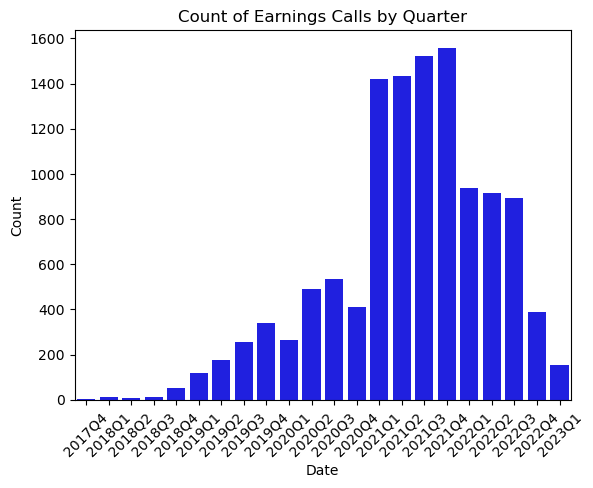

In [6]:
time_df = pd.DataFrame(stock.groupby(pd.Grouper(key='date', freq='1QE')).ticker.count())
time_df.reset_index(inplace=True)
time_df['date'] = pd.PeriodIndex(time_df.date, freq='Q')
time_df
ax = sns.barplot(time_df, x='date', y='ticker', color='blue')
ax.set(title='Count of Earnings Calls by Quarter', xlabel='Date', ylabel='Count')
tmp = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

#### Number of Unique Stocks

In [7]:
len(stock['ticker'].unique())

2015

#### Median Earnings Calls per Stock

In [8]:
stock.groupby(by='ticker')['ticker'].count().median()

6.0

#### Mean 10-day Volatility

In [20]:
stock['vol10'].abs().mean()

1.8374996917280026

#### Mean Volatility Change (after earnings)

In [19]:
stock['vol_score'].abs().mean()

2.346769515657889

#### Range of Volatility Scores

`vol_score` is the range of "volatility units" that a stock moves in response to earnings news

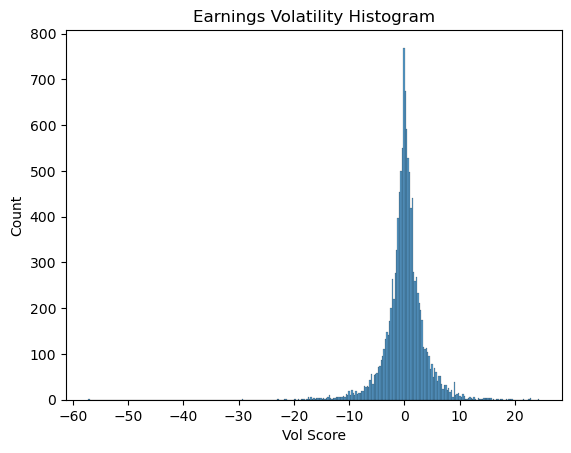

In [9]:
ax = sns.histplot(data=stock, x='vol_score')
tmp = ax.set(title='Earnings Volatility Histogram', xlabel='Vol Score', ylabel='Count')

In [10]:
print(np.min(stock['vol_score']), 
      np.max(stock['vol_score']))

-57.195510767710516 24.444501351041097


#### Relationship between `sentiment` and `vol_score`

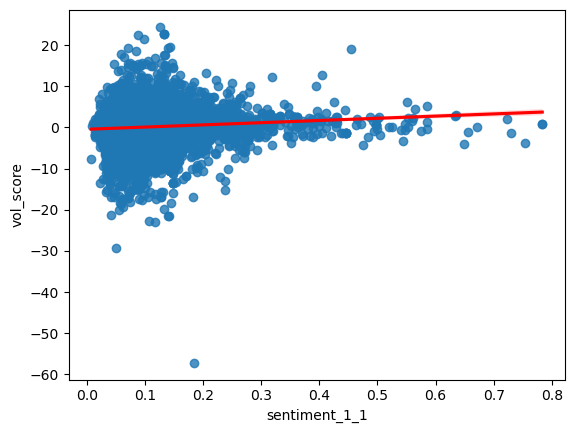

In [11]:
ax = sns.regplot(data=stock, x='sentiment_1_1', y='vol_score', line_kws={'color':'red'})

#### Relationship between `surprise_vol` and `vol_score`

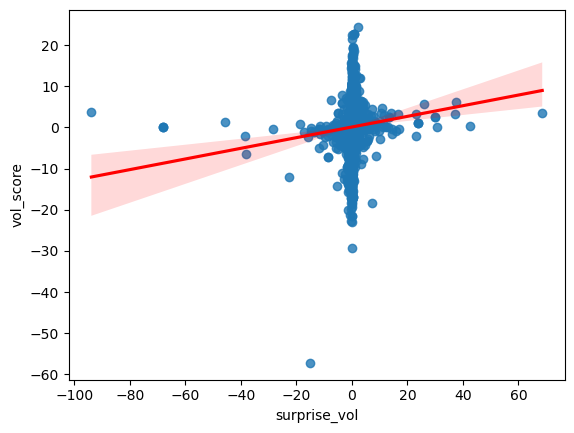

In [12]:
ax = sns.regplot(data=stock, x='surprise_vol', y='vol_score', line_kws={'color':'red'})

#### Relationship between `positive` and `vol_score`

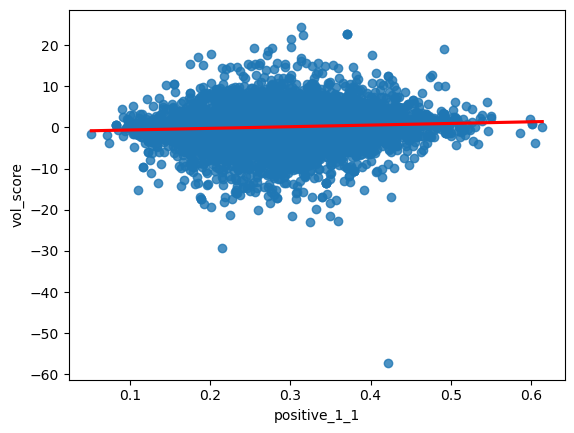

In [13]:
ax = sns.regplot(data=stock, x='positive_1_1', y='vol_score', line_kws={'color':'red'})

#### Relationship between `negative` and `vol_score`

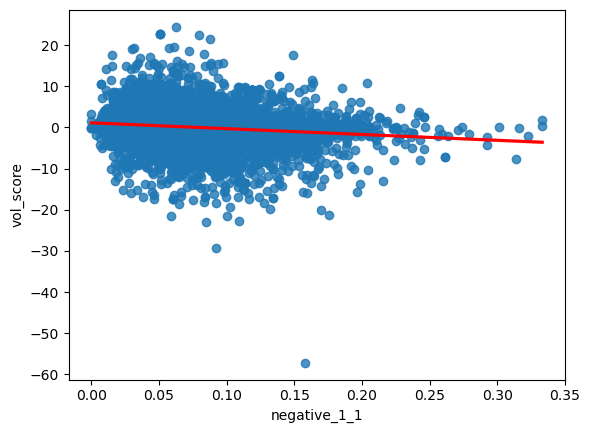

In [14]:
ax = sns.regplot(data=stock, x='negative_1_1', y='vol_score', line_kws={'color':'red'})